**Image filtering with different kernels**
 1. Filtering using yourself code
 2. Filtering using opencv
 3. Comparison with different kernels

# Filtering with your own code

In [1]:
import cv2
import numpy
from skimage import io
from skimage import data
import matplotlib.pyplot as plt

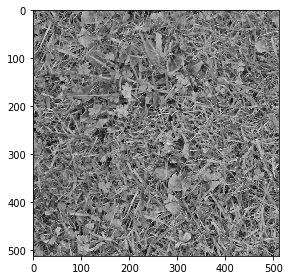

In [7]:
im1 = data.grass()
type(im1)
im1= np.array(im1)
type(im1)
io.imshow(im1)

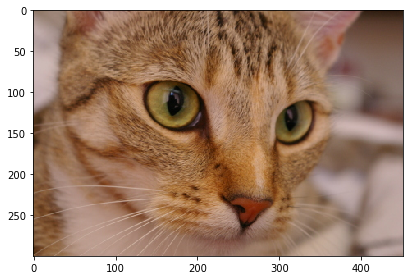

In [8]:
# im = io.imread('lena.png')
im = data.chelsea()
io.imshow(im)

In [7]:
im.shape
im.ndim

3

In [23]:
im = data.astronaut()
im = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
# compute the image fill size
pt_sz=3
fll_sz =np.int(pt_sz/2) 

print('image fill size:{}'.format(fll_sz))

# fill the image boundary
h,w = im.shape


# *********************************************************
# define image fill function byself/
# def imgfill(im, fll_sz, val):
#     h, w = im.shape
#     outImg = np.zeros((h+2*fll_sz, w+2*fll_sz))
#     # put the original image into the center of the output image
#     outImg[fll_sz:h+fll_sz, fll_sz:w+fll_sz]=im
#     # fill the values in the left column
#     outImg[0:fll_sz, 0:h+2*fll_sz]=val
#     # fill the values in the top column
#     outImg[0:h+2*fll_sz, 0:fll_sz]=val
#     # fill the values in right column
#     outImg[0:h+2*fll_sz, w+fll_sz:w+2*fll_sz]=val
#     # fill the values in the bottom column
#     outImg[h+fll_sz:h+2*fll_sz, 0:w+2*fll_sz]=val
#     return outImg
# img = imgfill(im, fll_sz, 100)
# *********************************************************

# *****************************************************
# fill the image boundary with opencv function
img = cv2.copyMakeBorder(im,fll_sz,fll_sz,fll_sz,fll_sz,cv2.BORDER_REPLICATE)
print(img)

ker = np.array([[1,1,1],
               [1,1,1],
               [1,1,1]])
ker = ker/9

stp=1
outImg = np.zeros(img.shape)
# start = time.process_time ()
for i in range(0, h-fll_sz): # heigth
    for j in range(0, w-fll_sz): # width
        # get the region in image extended image[3*3]
        ptRg = img[i:i+pt_sz,j:j+pt_sz]
        # mulitiplication between the kerner and image 
        print('(i:{},j:{})'.format(i, j))
        outImg[i,j]=np.sum(ptRg*ker)

# end = time.process_time ()

# print('time is: {}'.format(end-start))
plt.subplot(1,2,1)
plt.imshow(im,cmap='gray')
plt.title('original image')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(outImg,cmap='gray')
plt.title('meanImg')
plt.axis('off')

image fill size:1
[[150 150 107 ... 117 120 120]
 [150 150 107 ... 117 120 120]
 [173 173 142 ... 117 116 116]
 ...
 [173 173 172 ...   1   0   0]
 [173 173 171 ...   1   0   0]
 [173 173 171 ...   1   0   0]]


ValueError: operands could not be broadcast together with shapes (2,2) (3,3) 

# Filtering using opencv

In [ ]:
cv2.filter2D??

## Sharpen kernel

origin size:(200, 200), filtering size:(200, 200)


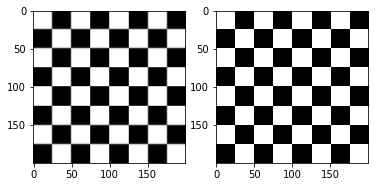

In [12]:
# im =io.imread('lena.png')
im = data.checkerboard()
if im.ndim==3:
    im = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)

kr = np.array([[-1,-1,-1],
            [-1,9,-1],
            [-1,-1,-1]])
res = cv2.filter2D(im,-1, kr)

plt.subplot(1,2,1)
plt.imshow(im,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(res, cmap='gray')

print('origin size:{}, filtering size:{}'.format(im.shape, res.shape))

## Emboss kernel

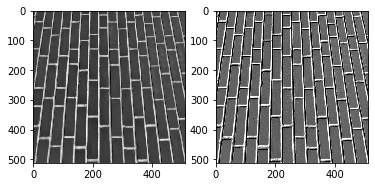

In [15]:
im = data.brick()
kr = np.array([[-2, -1, 0],
                     [-1, 1, 1],
                     [0, 1, 2]])
res = cv2.filter2D(im,-1, kr)

plt.subplot(1,2,1)
plt.imshow(im,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(res, cmap='gray')

## Laplacian kernel

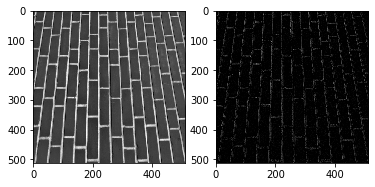

In [16]:
kr = np.array([[0, -1, 0],
                     [-1, 4, -1],
                     [0, -1, 0]])
res = cv2.filter2D(im,-1, kr)

plt.subplot(1,2,1)
plt.imshow(im,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(res, cmap='gray')

## Sobel kernel


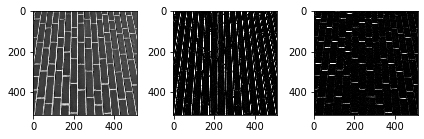

In [17]:
kr_H = np.array([[-1, 0, 1],
                     [-2, 0, 2],
                     [-1, 0, 1]])
res_h = cv2.filter2D(im,-1, kr_H)
res_v = cv2.filter2D(im,-1, kr_H.T)

plt.subplot(1,3,1)
plt.imshow(im,cmap='gray')
plt.subplot(1,3,2)
# plt.imshow(res_h, cmap='gray')
io.imshow(res_h)
plt.subplot(1,3,3)
# plt.imshow(res_v, cmap='gray')
io.imshow(res_v)

## Prewitt kernel

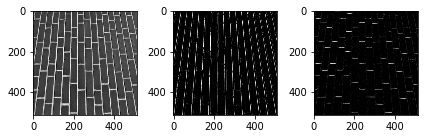

In [18]:
kr_H = np.array([[-1, 0, 1],
                     [-1, 0, 1],
                     [-1, 0, 1]])
res_h = cv2.filter2D(im,-1, kr_H)
res_v = cv2.filter2D(im,-1, kr_H.T)

plt.subplot(1,3,1)
plt.imshow(im,cmap='gray')
plt.subplot(1,3,2)
# plt.imshow(res_h, cmap='gray')
io.imshow(res_h)
plt.subplot(1,3,3)
# plt.imshow(res_v, cmap='gray')
io.imshow(res_v)

## Mean filtering

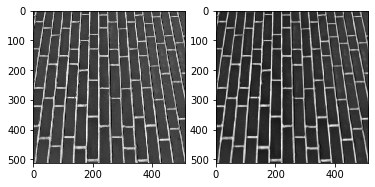

In [19]:
kr = np.array([[1, 1, 1],
                     [1, 1, 1],
                     [1, 1, 1]])
kr = kr/9
res = cv2.filter2D(im,-1, kr)

plt.subplot(1,2,1)
plt.imshow(im,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(res, cmap='gray')

# Comparison between kernels

## Gaussian and mean kernel

(-0.5, 463.5, 336.5, -0.5)

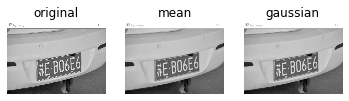

In [20]:
im = io.imread('car.png', as_gray=True)

kr_m = np.array([[1, 1, 1],
                     [1, 1, 1],
                     [1, 1, 1]])
kr_m = kr/9
res = cv2.filter2D(im,-1, kr_m)

kr_g = np.array([[1, 2, 1],
                     [2, 4, 2],
                     [1, 2, 1]])
kr_g = kr_g/16
res_g = cv2.filter2D(im,-1, kr_g)
plt.subplot(1,3,1)
plt.title('original')
plt.imshow(im,cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title('mean')
plt.imshow(res, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title('gaussian')
plt.imshow(res_g, cmap='gray')
plt.axis('off')

In [33]:
plt.subplot??

## Edge kernels

(-0.5, 511.5, 511.5, -0.5)

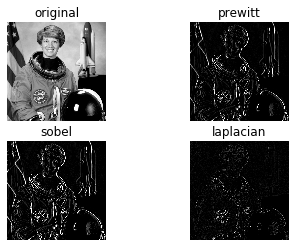

In [21]:
# im = io.imread('car.png', as_gray=True)
im = data.astronaut()
# type(im)
im = cv2.cvtColor(np.uint8(im), cv2.COLOR_RGB2GRAY)

kr_p = np.array([[-1, 0, 1],
                     [-1, 0, 1],
                     [-1, 0, 1]])
res_p = cv2.filter2D(im,-1, kr_p)

kr_s = np.array([[-1, 0, 1],
                     [-2, 0, 2],
                     [-1, 0, 1]])

res_s = cv2.filter2D(im,-1, kr_s)
                 
kr_l = np.array([[0, -1, 0],
                     [-1, 4, -1],
                     [0, -1, 0]])
res_l = cv2.filter2D(im, -1, kr_l)

plt.subplot(2,2,1)
plt.title('original')
plt.imshow(im,cmap='gray')
plt.axis('off')

plt.subplot(2,2,2)
plt.title('prewitt')
plt.imshow(res_p, cmap='gray')
plt.axis('off')

plt.subplot(2,2,3)
plt.title('sobel')
plt.imshow(res_s, cmap='gray')
plt.axis('off')

plt.subplot(2,2,4)
plt.title('laplacian')
plt.imshow(res_l, cmap='gray')
plt.axis('off')